In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#import extractor
%matplotlib inline
import random
import gc
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/mal_1.csv")

In [4]:
df2=pd.read_csv("/Users/abhinavshinow/Documents/GitHub/Mal_URL/Data/mal_2.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  450176 non-null  int64 
 1   url         450176 non-null  object
 2   label       450176 non-null  object
 3   result      450176 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 13.7+ MB


Preprocessing

In [9]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [10]:
df['type']=df['type'].replace({'phishing':1,'benign':0,'defacement':1,'malware':1})
#df3['type']=df3['label'].replace({'bad':1,'good':0})

In [11]:
df.drop_duplicates(keep='first',inplace=True)

In [12]:
df.head()

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1


In [14]:
df2.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [15]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2.drop('label',axis = 1, inplace = True)

In [17]:
df2.drop_duplicates(keep='first',inplace=True)

In [18]:
df2=df2.rename(columns={'result': 'type'})

In [20]:
df.head()

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1


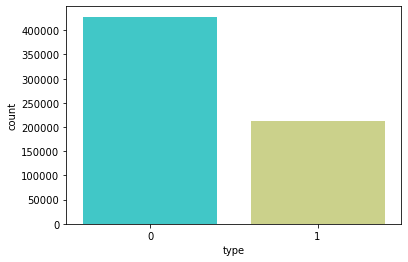

In [21]:
sns.countplot(x='type',data=df, palette='rainbow')
plt.show()

In [19]:
df2.head()

,url,type
0,https://www.google.com,0
1,https://www.youtube.com,0
2,https://www.facebook.com,0
3,https://www.baidu.com,0
4,https://www.wikipedia.org,0


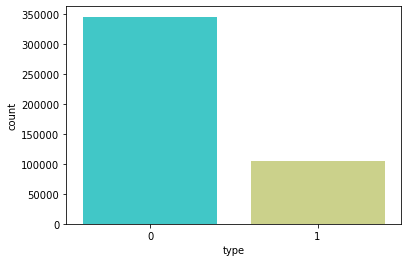

In [22]:
sns.countplot(x='type',data=df2, palette='rainbow')
plt.show()

In [23]:
df=df.append(df2)

In [24]:
df.head()

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,1
4,http://adventure-nicaragua.net/index.php?optio...,1


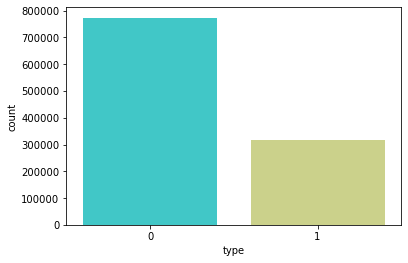

In [25]:
sns.countplot(x='type',data=df, palette='rainbow')
plt.show()

In [26]:
df.drop_duplicates(keep='first',inplace=True)

In [42]:
def getTokens(input):
    tokensBySlash = str(input.encode('utf-8')).split('/')
    allTokens=[]
    for i in tokensBySlash:
        tokens = str(i).split('-')
        tokensByDot = []
        for j in range(0,len(tokens)):
            tempTokens = str(tokens[j]).split('.')
            tokentsByDot = tokensByDot + tempTokens
        allTokens = allTokens + tokens + tokensByDot
    allTokens = list(set(allTokens))
    #if 'com' in allTokens:
        #allTokens.remove('com')
    return allTokens

In [43]:
data=np.array(df)

In [44]:
random.shuffle(data)

In [45]:
y=[d[1] for d in data]
url=[d[0] for d in data]
vectorised_url=TfidfVectorizer(tokenizer=getTokens)
x=vectorised_url.fit_transform(url)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle='True')
gc.collect

<function gc.collect(generation=2)>

In [47]:
model=LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(x_train,y_train)
# model=RandomForestClassifier(n_jobs=8)
# model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [48]:
model.score(x_test,y_test)

0.9557891454096842

In [49]:
pred=model.predict(x_test)

In [50]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[160375    263]
 [  9377  48031]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    160638
           1       0.99      0.84      0.91     57408

    accuracy                           0.96    218046
   macro avg       0.97      0.92      0.94    218046
weighted avg       0.96      0.96      0.95    218046

